In [ ]:
import numpy as np
import json

In [2]:
json_path = './llama_interview_model/checkpoint-360/trainer_state.json'

In [5]:
from pprint import pprint

In [7]:
# JSON 파일을 읽기 모드('r')로 엽니다.
with open(json_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

item = data['log_history']

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows: 'Malgun Gothic', macOS: 'AppleGothic')
# 사용자의 환경에 맞는 폰트 이름을 지정해주세요.
# 터미널에서 `fc-list :lang=ko` 명령어로 사용 가능한 한글 폰트 목록을 확인할 수 있습니다.
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows 기준
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

In [10]:
# 데이터 추출
steps = [d['step'] for d in item]
losses = [d['loss'] for d in item]
accuracies = [d['mean_token_accuracy'] for d in item]

In [13]:
print(losses[-1])

0.9677


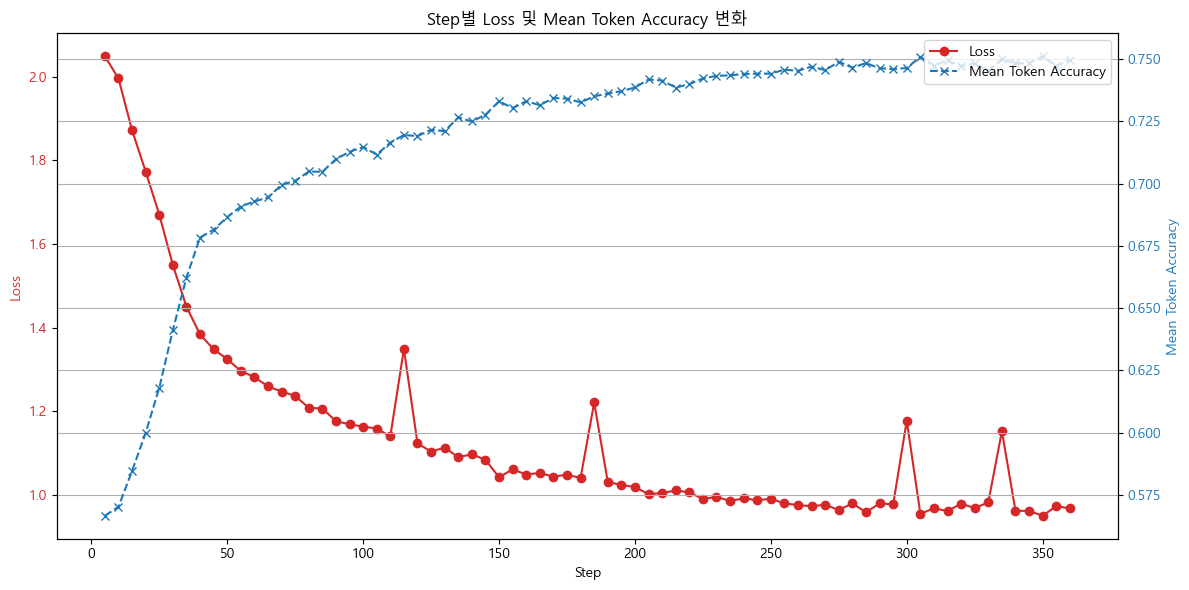

In [12]:
# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# Loss 그래프 (왼쪽 Y축)
color = 'tab:red'
ax1.set_xlabel('Step')
ax1.set_ylabel('Loss', color=color)
ax1.plot(steps, losses, color=color, marker='o', linestyle='-', label='Loss')
ax1.tick_params(axis='y', labelcolor=color)

# Accuracy 그래프 (오른쪽 Y축)
ax2 = ax1.twinx()  # x축을 공유하는 두 번째 y축 생성
color = 'tab:blue'
ax2.set_ylabel('Mean Token Accuracy', color=color)
ax2.plot(steps, accuracies, color=color, marker='x', linestyle='--', label='Mean Token Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

# 제목 및 범례
plt.title('Step별 Loss 및 Mean Token Accuracy 변화')
fig.tight_layout()  # 레이아웃 조정
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.grid(True)
plt.show()